<a href="https://colab.research.google.com/github/imyoumin/IUXD_2024_TA_Tutoring/blob/main/photo_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트
*   Google drive mount



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 필요 라이브러리 설치

*   Install necessary library



In [ ]:
from PIL import Image, ImageOps
import numpy as np
import os

# 이미지 로드 함수

*   image load function



In [ ]:
def load_images(image_dir):
    images = []
    for filename in os.listdir(image_dir):
        img = Image.open(os.path.join(image_dir, filename))
        if img is not None:
            images.append(img)
    return images

# 이미지 리사이즈 함수
*   image resize function




In [ ]:
def resize_image(image, new_width, new_height):
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)
    return resized_image

# 평균 색상 구하는 함수
*   Function to calculate average color



In [ ]:
def get_average_color(image):
    np_image = np.array(image)
    if len(np_image.shape) == 2:
        np_image = np.expand_dims(np_image, axis=2)
        np_image = np.repeat(np_image, 3, axis=2)
    w, h, d = np_image.shape
    return tuple(np.average(np_image.reshape(w*h, d), axis=0))

# 포토 모자이크 생성 함수
*   Photo mosaic creation function



In [ ]:
def create_photomosaic(target_image, input_images, grid_size, reuse_images=True):
    target_images = []
    width, height = target_image.size
    grid_w, grid_h = grid_size
    width_per_piece = width / grid_w
    height_per_piece = height / grid_h
    mosaic_image = Image.new('RGB', (width, height))

    for j in range(grid_h):
        for i in range(grid_w):
            left = int(i * width_per_piece)
            upper = int(j * height_per_piece)
            right = int((i + 1) * width_per_piece) if i < grid_w - 1 else width
            lower = int((j + 1) * height_per_piece) if j < grid_h - 1 else height
            current_width = right - left
            current_height = lower - upper
            piece = target_image.crop((left, upper, right, lower))
            target_images.append(get_average_color(piece))
    avg_colors = [get_average_color(img) for img in input_images]

    for i, target_color in enumerate(target_images):
        diff = [np.sum((np.array(target_color) - np.array(color))**2) for color in avg_colors]
        index = diff.index(min(diff))
        x = int((i % grid_w) * width_per_piece)
        y = int((i // grid_w) * height_per_piece)
        resized_img = resize_image(input_images[index], current_width, current_height)
        mosaic_image.paste(resized_img, (x, y))
    return mosaic_image

# 실행
*   run





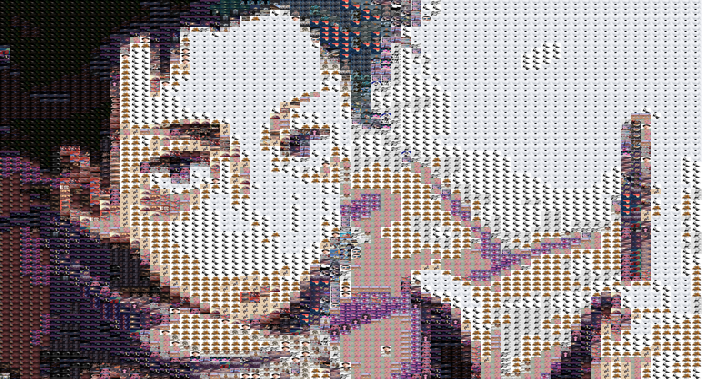

In [ ]:
image_dir = '/content/drive/MyDrive/데이터 셋'   # Image dataset file path
target_image_path = '/content/drive/MyDrive/uta.JPG' # Target image file path
target_image = Image.open(target_image_path)
input_images = load_images(image_dir)

mosaic = create_photomosaic(target_image, input_images, (100, 100), reuse_images=True)
# Enter grid division degree (current value 100, 100)
display(mosaic)